In [7]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="root",
    database="TwitterDB",
    charset = 'utf8'
)

Airbnb Negative Tweets Monitor: 
  2021-11-04 17:55:12  Well said Billy! It's time these idiots were called out for what they are.
  2021-11-04 17:55:16  No sky internet was nothing wrong with anything check ur app before posting on Facebook storys https://t.co/I9iuBnkyG9
  2021-11-04 17:55:21  RT @MobilePunch: (Josh2funny); Ayo Ajewole (Woli Agba); Adebamiro Adeyanju (Mr. Hyenana), Adeoye Adeyemi Elesho (Yemi Elesho), among others
  2021-11-04 17:55:49  RT @Pandamoanimum: Just saw this on Facebook. Hopefully it might help anyone who has pets that hate fireworks. https://t.co/Zn5ezpsm8n
  2021-11-04 17:56:03  #Twitter is getting as censorship mad as #Facebook .
  2021-11-04 17:56:04  RT @bimedotcom: Facebook's #metaverse plans labelled as 'dystopian' and 'a bad idea' 
https://t.co/FhG5RvJiZi by @janewakefield via @BBCNew
  2021-11-04 17:56:10  These photos? Nope, those are still images from a fake video created by youtuber and CG artist SECTION 51: https://t.co/GLqhRGSfKZ
  2021-11-04 

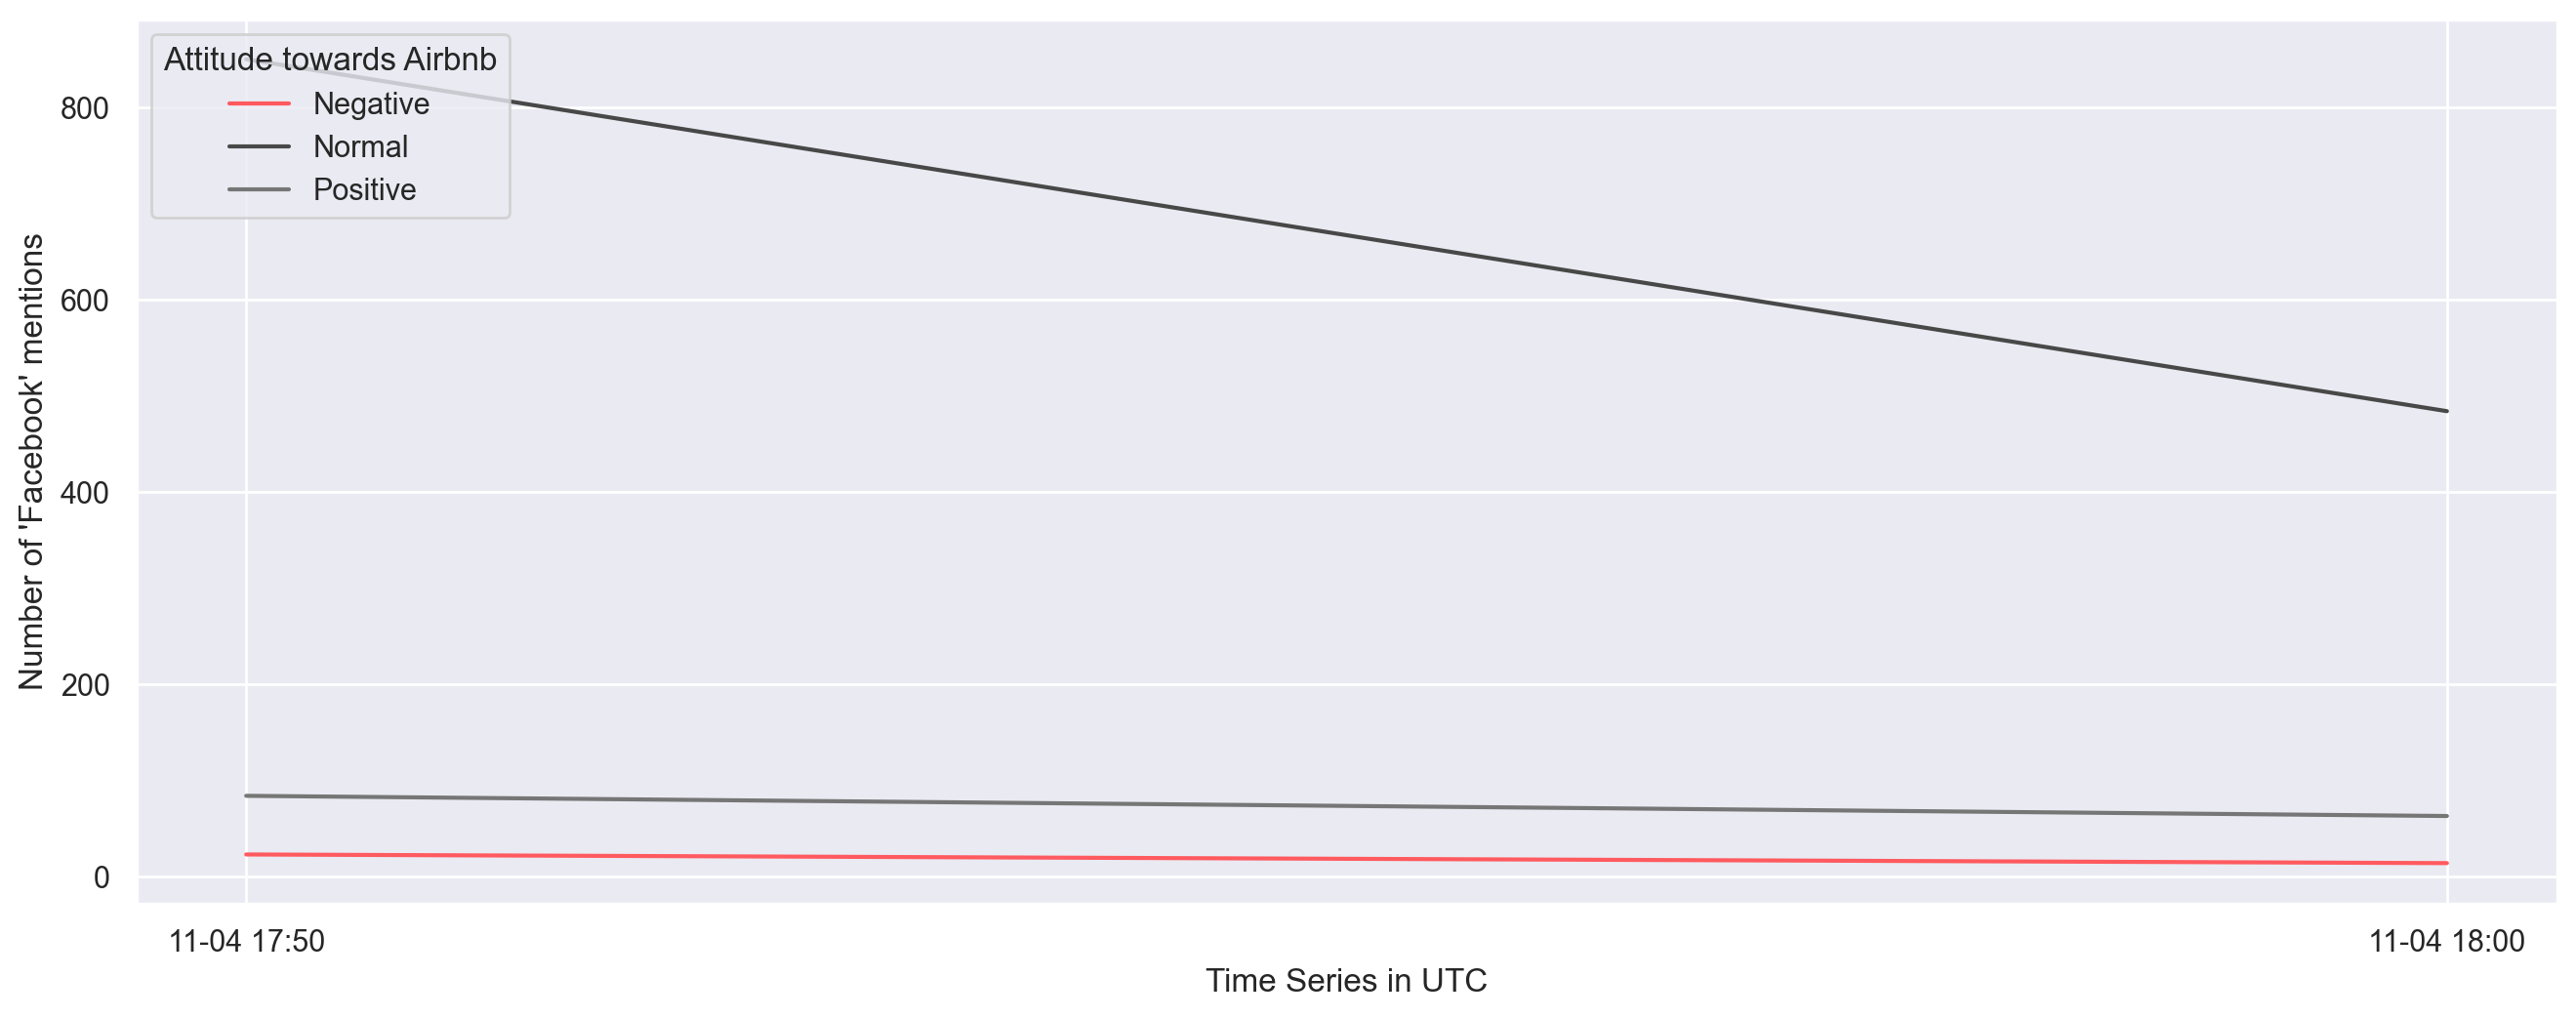

In [8]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Airbnb Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Airbnb', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [9]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="es")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

You should consider upgrading via the 'c:\users\supreme computers\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States'